In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import svm

In [25]:
def Show_data(df):
    y = [len(df[df[1]=='B'])/len(df), len(df[df[1]=='M'])/len(df)]
    x = ['B', 'M']
    print(x[0], len(df[df[1]=='B']), x[1], len(df[df[1]=='M']))
    plt.bar(x, y)
    plt.ylabel('% of data')
    plt.xlabel('Answer')
    plt.show()

def Numeric(df):
    L = []
    cheat = {'B':0, 'M':1}
    for element in df[1]:
        L.append(cheat[element])
    df[1] = L
    return np.matrix(df)

def Importance(clf):
    a = clf.feature_importances_
    plt.xticks(rotation='vertical')
    keys = [i for i in range(30)]
    plt.bar(keys, clf.feature_importances_)
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.show()
    
def Split(data):
    x = data[:,1:]
    y = data[:,0]
    x_train, x_aux, y_train, y_aux = train_test_split(x,y,test_size=0.3)
    x_val, x_test, y_val, y_test = train_test_split(x_aux,y_aux,test_size=0.5)
    return x_train, y_train, x_test, y_test, x_val, y_val

def RF(x_train, y_train, x_test, y_test):
    clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
    clf.fit(x_train, np.ravel(y_train))
    predictions = clf.predict(x_test)
    print('Accuracy on the training set:', accuracy_score(y_train, y_train))
    print('Accuracy on the test set:', accuracy_score(y_test, predictions))
    print('Precision on the test set:', precision_score(y_test, predictions))
    print('Recall on the test set:', recall_score(y_test, predictions))
    return clf
def Trees(x_train, y_train, x_test, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(x_train, np.ravel(y_train))
    predictions = clf.predict(x_test)
    print('Accuracy on the training set:', accuracy_score(y_train, y_train))
    print('Accuracy on the test set:', accuracy_score(y_test, predictions))
    print('Precision on the test set:', precision_score(y_test, predictions))
    print('Recall on the test set:', recall_score(y_test, predictions))
    return clf
def NN(x_train, y_train, x_test, y_test):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
    clf.fit(x_train, np.ravel(y_train))
    predictions = clf.predict(x_test)
    print('Accuracy on the training set:', accuracy_score(y_train, y_train))
    print('Accuracy on the test set:', accuracy_score(y_test, predictions))
    print('Precision on the test set:', precision_score(y_test, predictions))
    print('Recall on the test set:', recall_score(y_test, predictions))
    return clf
def SVM(x_train, y_train, x_test, y_test):
    clf = svm.SVC(kernel='rbf', gamma=0.0001, C=100)
    clf.fit(x_train, np.ravel(y_train))
    predictions = clf.predict(x_test)
    print('Accuracy on the training set:', accuracy_score(y_train, y_train))
    print('Accuracy on the test set:', accuracy_score(y_test, predictions))
    print('Precision on the test set:', precision_score(y_test, predictions))
    print('Recall on the test set:', recall_score(y_test, predictions))
    return clf

B 357 M 212


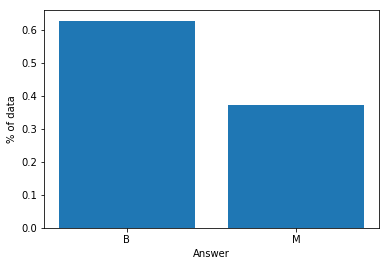


Results for random forest:
Accuracy on the training set: 1.0
Accuracy on the test set: 0.988372093023
Precision on the test set: 1.0
Recall on the test set: 0.970588235294

Results for trees:
Accuracy on the training set: 1.0
Accuracy on the test set: 0.906976744186
Precision on the test set: 0.861111111111
Recall on the test set: 0.911764705882

Results for neural networks:
Accuracy on the training set: 1.0
Accuracy on the test set: 0.96511627907
Precision on the test set: 0.969696969697
Recall on the test set: 0.941176470588

Results for SVM:
Accuracy on the training set: 1.0
Accuracy on the test set: 0.918604651163
Precision on the test set: 0.864864864865
Recall on the test set: 0.941176470588


In [29]:
df = pd.read_csv('Breast.csv', delimiter=',', header=None)
df = df.drop([0], axis=1)

Show_data(df)
data = Numeric(df)
x_train, y_train, x_test, y_test, x_val, y_val = Split(data)
print('\nResults for random forest:')
model_rf = RF(x_train, y_train, x_test, y_test)
print('\nResults for trees:')
model_tree = Trees(x_train, y_train, x_test, y_test)
print('\nResults for neural networks:')
model_nn = NN(x_train, y_train, x_test, y_test)
print('\nResults for SVM:')
model_nn = SVM(x_train, y_train, x_test, y_test)

Accuracy on the test set: 0.952941176471


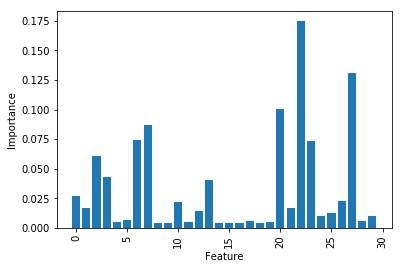

In [13]:
predictions = model_rf.predict(x_val)
print('Accuracy on the test set:', accuracy_score(y_val, predictions))
Importance(model_rf)